# Análise de Resultados

Recebe como entrada o arquivo `results_all_models.csv` para fazer tabelas e gráficos dos dados produzidos durante a criação dos modelos.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["lines.linewidth"] = 2

In [3]:
plt.ion()
sns.set_style("whitegrid")

In [4]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")

Essa tabela contém todos os dados colhidos, suas colunas são:

* `hidden_layer`:
> O número de neurônios na camada oculta. Valores `{25, 50, 100}`.
* `batch_size`:
> A quantidade de dados que foram usados para o treino para fazer o cálculo do gradiente descendente, `batch = 1` para SGD, `batch = 5000` para GD, `batch` com valores intermediários para mini-batch GD. Valores `{1, 10, 50, 100, 500, 1000, 5000}`.
* `learning_rate`:
> A taxa de atualização dos pesos pelo Gradiente Descendente. Valores `{0.1, 0.5, 1.0, 10.0}`.
* `taxa_acerto`:
> Valores entre `0` e `1` contendo a porcentagem de acerto de cada modelo no `dataset` de validação.
* `num_epochs`:
> Número de épocas de treino de cada modelo. Valor máximo `1000`.
* `train_loss` e `validation_loss`:
> 2 vetores contendo os valores dos erros de treino e validação no final de cada época.
* `min_train_loss` e `min_validation_loss`:
> Valores mínimos dos 2 vetores anteriores.
* `accuracy`:
> Categorização dos modelos separando os que possuem `taxa_acerto > 0.9` do restante.

In [5]:
results = pd.read_csv("results/results_all_models.csv")
results["training_loss"] = results["training_loss"].apply(lambda x: json.loads(x))
results["validation_loss"] = results["validation_loss"].apply(lambda x: json.loads(x))
results["min_training_loss"] = [np.min(x) for x in results["training_loss"]]
results["min_validation_loss"] = [np.min(x) for x in results["validation_loss"]]
results["accuracy"] = ["high" if a > 0.9 else "low" for a in results["taxa_acerto"]]
results

,hidden_layer,batch_size,learning_rate,taxa_acerto,num_epochs,training_loss,validation_loss,min_training_loss,min_validation_loss,accuracy
0,25,1,0.1,0.909524,23,"[2.0364409173624733, 1.7420774733788922, 1.652...","[1.8493631368591672, 1.668655066263108, 1.6521...",1.489473,1.556296,high
1,25,1,0.5,0.819048,14,"[1.8269686689851856, 1.672230700727319, 1.6486...","[1.6996918632870628, 1.6686583757400513, 1.667...",1.598901,1.637878,low
2,25,1,1.0,0.860762,15,"[1.8237533296292057, 1.6675205725053472, 1.623...","[1.6818285442533947, 1.6378612234478904, 1.630...",1.571631,1.586080,low
3,25,1,10.0,0.096952,5,"[2.345236935790097, 2.361130165395605, 2.36113...","[2.364198468980335, 2.364198468980335, 2.36419...",2.345237,2.364198,low
4,25,10,0.1,0.909048,135,"[2.2947008600234984, 2.2419018113613127, 2.146...","[2.2836520160947527, 2.20391761688959, 2.10722...",1.494516,1.559722,high
...,...,...,...,...,...,...,...,...,...,...
79,100,1000,10.0,0.805762,64,"[2.2964076519012453, 2.270519828796387, 2.2907...","[2.2857390301568166, 2.2087126970291138, 2.352...",1.613160,1.660197,low
80,100,5000,0.1,0.380357,1000,"[2.302971839904785, 2.3029322624206543, 2.3028...","[2.302956984156654, 2.3029218117396035, 2.3028...",2.135688,2.140702,low
81,100,5000,0.5,0.798238,1000,"[2.3019614219665527, 2.301788568496704, 2.3016...","[2.302327649933951, 2.302179461433774, 2.30203...",1.715177,1.720616,low
82,100,5000,1.0,0.830143,1000,"[2.3036067485809326, 2.3032422065734863, 2.302...","[2.3029242299851918, 2.302604470934187, 2.3022...",1.631474,1.647277,low


# Distribuição da Taxa de Acerto
Cerca de metade dos modelos têm relativa alta taxa de acerto.

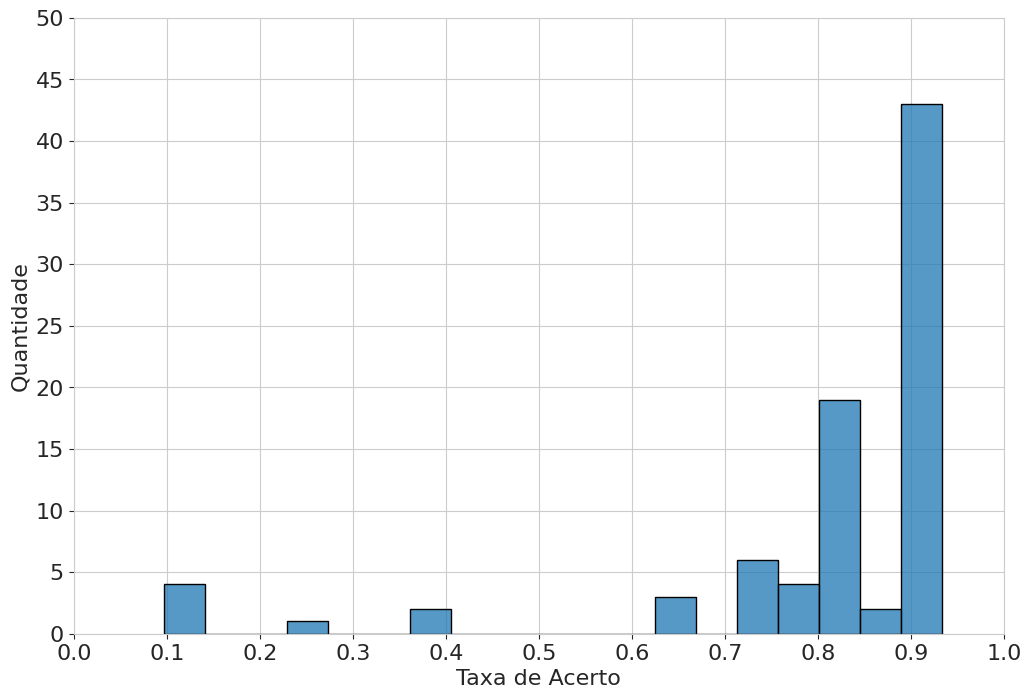

In [6]:
ax = sns.histplot(data=results["taxa_acerto"], edgecolor="k")
ax.set(
    xlabel="Taxa de Acerto",
    xticks=np.arange(0, 1.1, 0.1),
    ylabel="Quantidade",
    yticks=np.arange(0, 51, 5),
)
despine()

# Perdas de Treino e Validação

Devido ao critério de parada, não houve uma divergência entre os 2 valores de erro, o que indica que não houve overfitting, mas alguns modelos pararam antes de terem valores baixos de erros, indicando, nesses casos, underfitting.

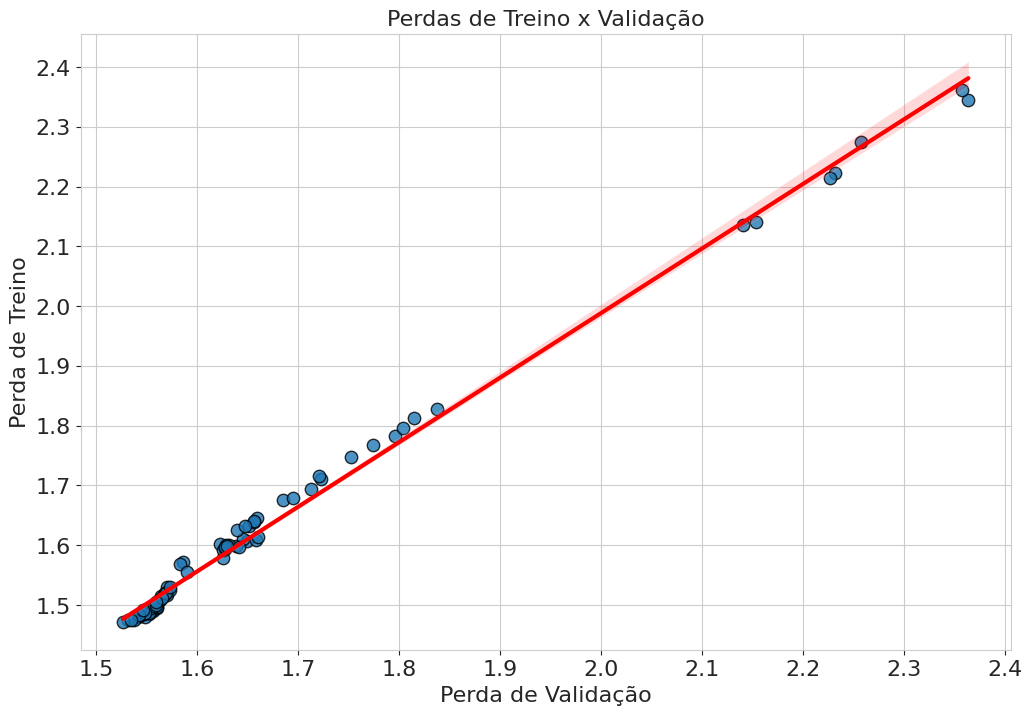

In [7]:
ax = sns.regplot(
    data=results,
    x="min_validation_loss",
    y="min_training_loss",
    line_kws={"color": "r"},
    scatter_kws={"edgecolor": "k", "s": 80, "alpha": 0.8},
)
ax.set(
    title="Perdas de Treino x Validação",
    xlabel="Perda de Validação",
    ylabel="Perda de Treino",
    xticks=np.arange(1.5, 2.45, 0.1),
    yticks=np.arange(1.5, 2.45, 0.1),
)
despine()

Como esperado, os modelos de menor erro tiveram a tendência de terem maiores taxas de acerto.

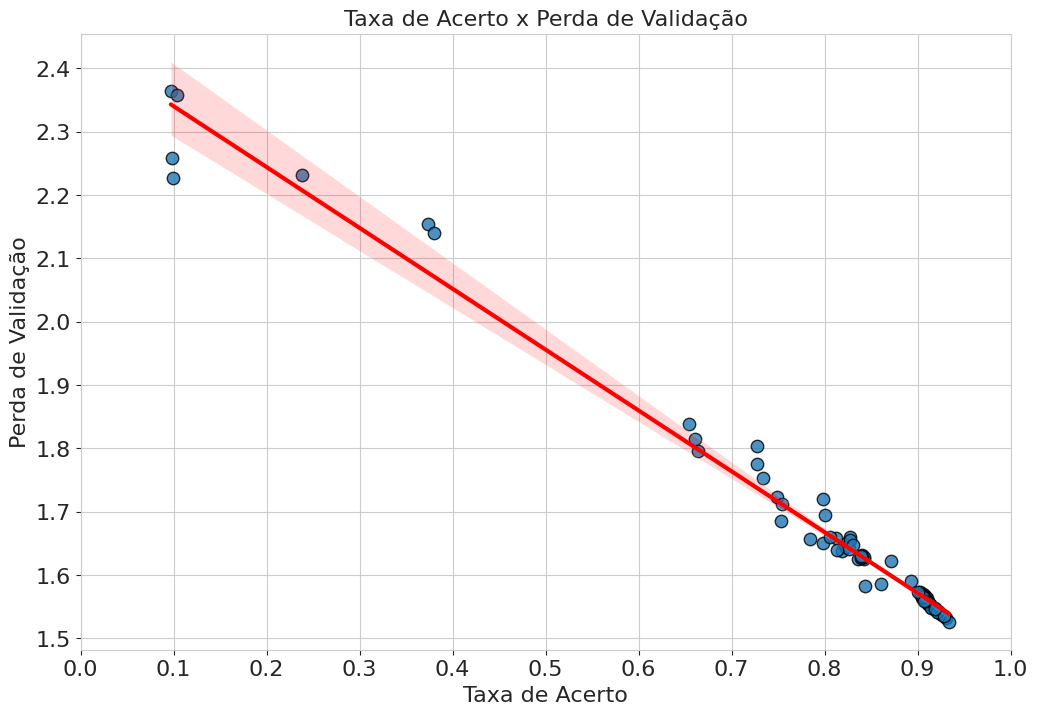

In [8]:
ax = sns.regplot(
    data=results,
    x="taxa_acerto",
    y="min_validation_loss",
    line_kws={"color": "r"},
    scatter_kws={"edgecolor": "k", "s": 80, "alpha": 0.8},
)
ax.set(
    title="Taxa de Acerto x Perda de Validação",
    ylabel="Perda de Validação",
    xlabel="Taxa de Acerto",
    xticks=np.arange(0, 1.1, 0.1),
    yticks=np.arange(1.5, 2.45, 0.1),
)
despine()

# Distribuição de Taxa de Acerto por tamanhos da Camada Oculta.
Em cada grupo de acurácia, há uma certa igualdade entre modelos diferindo apenas a camada oculta.

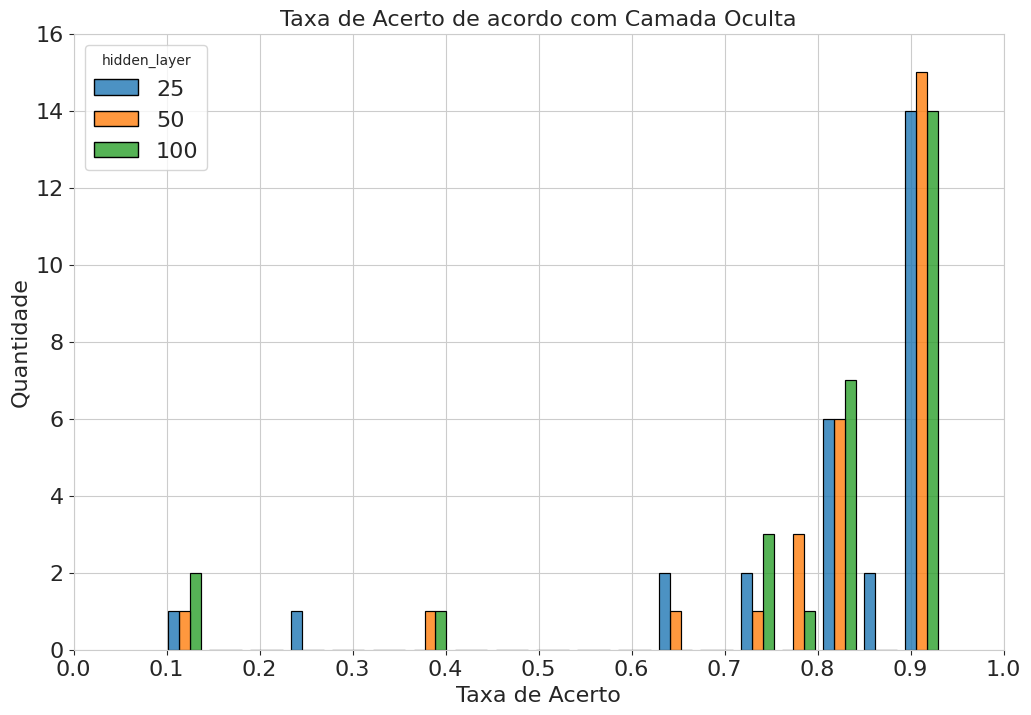

In [9]:
ax = sns.histplot(
    data=results,
    x="taxa_acerto",
    alpha=0.8,
    edgecolor="k",
    hue="hidden_layer",
    multiple="dodge",
    shrink=0.8,
    palette="tab10",
)
ax.set(
    title="Taxa de Acerto de acordo com Camada Oculta",
    xlabel="Taxa de Acerto",
    ylabel="Quantidade",
    xticks=np.arange(0, 1.1, 0.1),
    yticks=np.arange(0, 17, 2),
)
despine()

Independente do tamanho da camada oculta, há aproximadamente 50% de modelos com alta taxa de acerto `(>90%)`.

In [10]:
col = "hidden_layer"
relacao_hidden_accuracy = (
    results[[col, "accuracy"]].loc[results["accuracy"] == "high"].groupby(col).count()
    / results[[col, "accuracy"]].groupby(col).count()
)
relacao_hidden_accuracy

,accuracy
hidden_layer,
25,0.500000
50,0.535714
100,0.464286


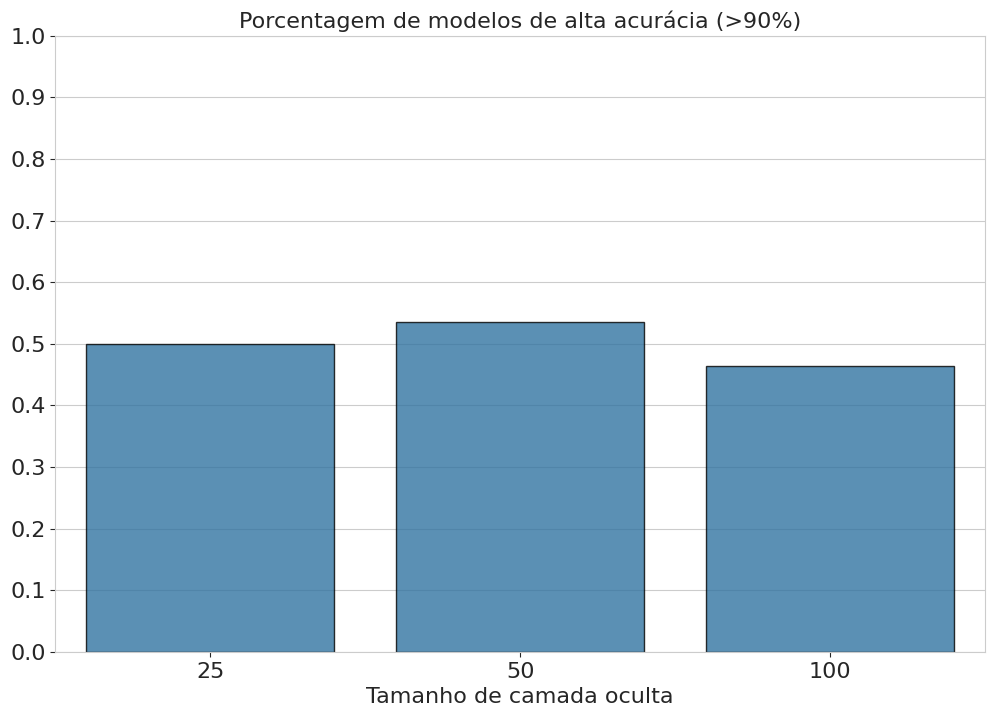

In [11]:
ax = sns.barplot(
    data=relacao_hidden_accuracy,
    x="hidden_layer",
    y="accuracy",
    alpha=0.8,
    edgecolor="k",
)
ax.set(
    title="Porcentagem de modelos de alta acurácia (>90%)",
    xlabel="Tamanho de camada oculta",
    ylabel=None,
    yticks=np.arange(0, 1.1, 0.1),
)
despine()

# Distribuição de Taxa de Acerto por tamanhos do Batch
No caso de `batch_size`, observou-se diferenças nas taxas de acertos, valores mais extremos tiveram piores resultados, enquanto os valores de `10, 50, 100` tiveram maior número de modelos com maior acurácia, sendo `batch_size = 50` o melhor geral com 11 de 12 modelos com acerto maior que 90%.

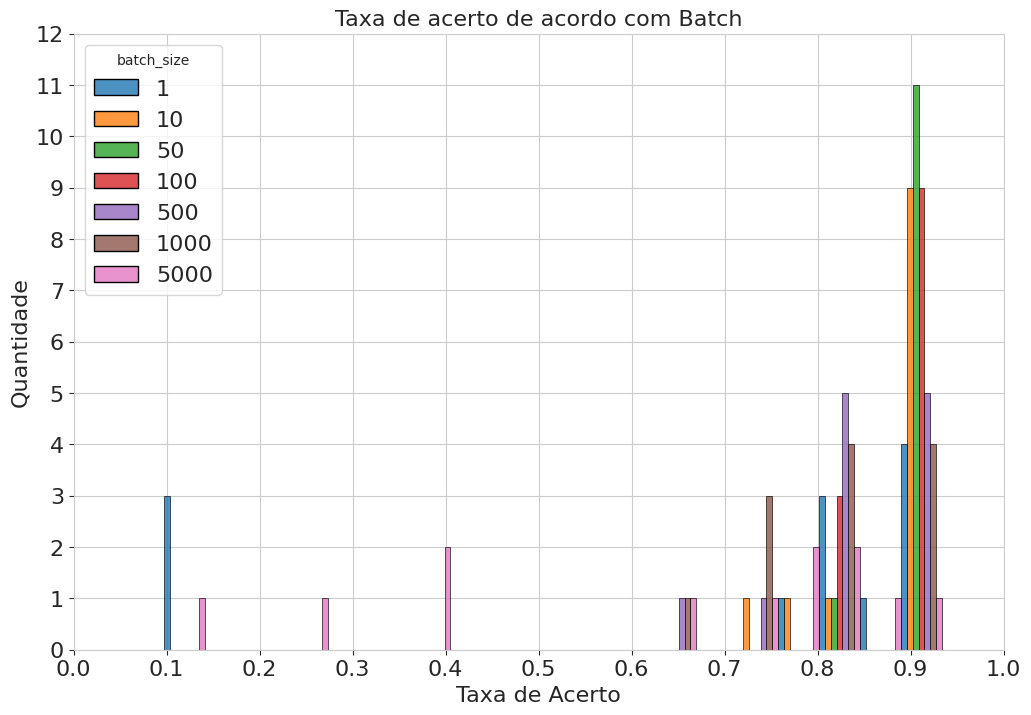

In [12]:
ax = sns.histplot(
    data=results,
    x="taxa_acerto",
    alpha=0.8,
    edgecolor="k",
    hue="batch_size",
    multiple="dodge",
    palette="tab10",
)
ax.set(
    title="Taxa de acerto de acordo com Batch",
    xlabel="Taxa de Acerto",
    ylabel="Quantidade",
    xticks=np.arange(0, 1.1, 0.1),
    yticks=np.arange(0, 13, 1),
)
despine()

In [13]:
col = "batch_size"
relacao_batch_accuracy = (
    results[[col, "accuracy"]].loc[results["accuracy"] == "high"].groupby(col).count()
    / results[[col, "accuracy"]].groupby(col).count()
)
relacao_batch_accuracy

,accuracy
batch_size,
1,0.333333
10,0.750000
50,0.916667
100,0.750000
500,0.416667
1000,0.250000
5000,0.083333


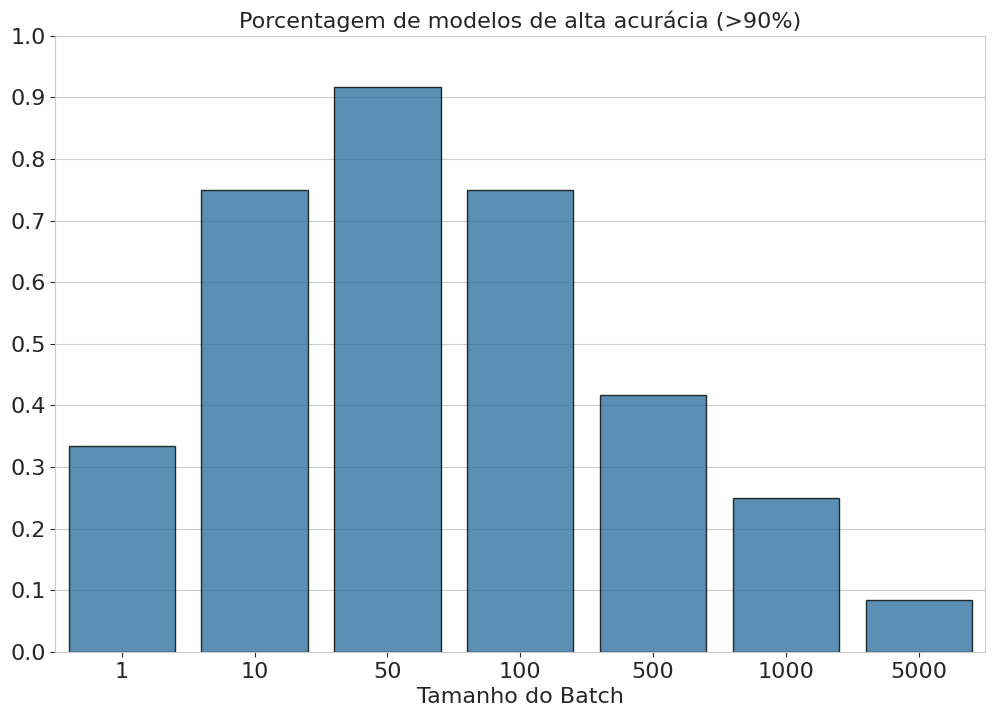

In [14]:
ax = sns.barplot(
    data=relacao_batch_accuracy,
    x="batch_size",
    y="accuracy",
    alpha=0.8,
    edgecolor="k",
)
ax.set(
    title="Porcentagem de modelos de alta acurácia (>90%)",
    xlabel="Tamanho do Batch",
    ylabel=None,
    yticks=np.arange(0, 1.1, 0.1),
)
despine()

# Distribuição de Taxa de Acerto por Taxa de Aprendizado
No geral, não se observou grandes diferenças nos casos de modelos de alta taxa de acerto, embora os piores modelos têm `lr = 0.1`, indicando que a redução do erro foi muito lenta levando em consideração o número máximo de épocas e o critério de parada e `lr = 10`.

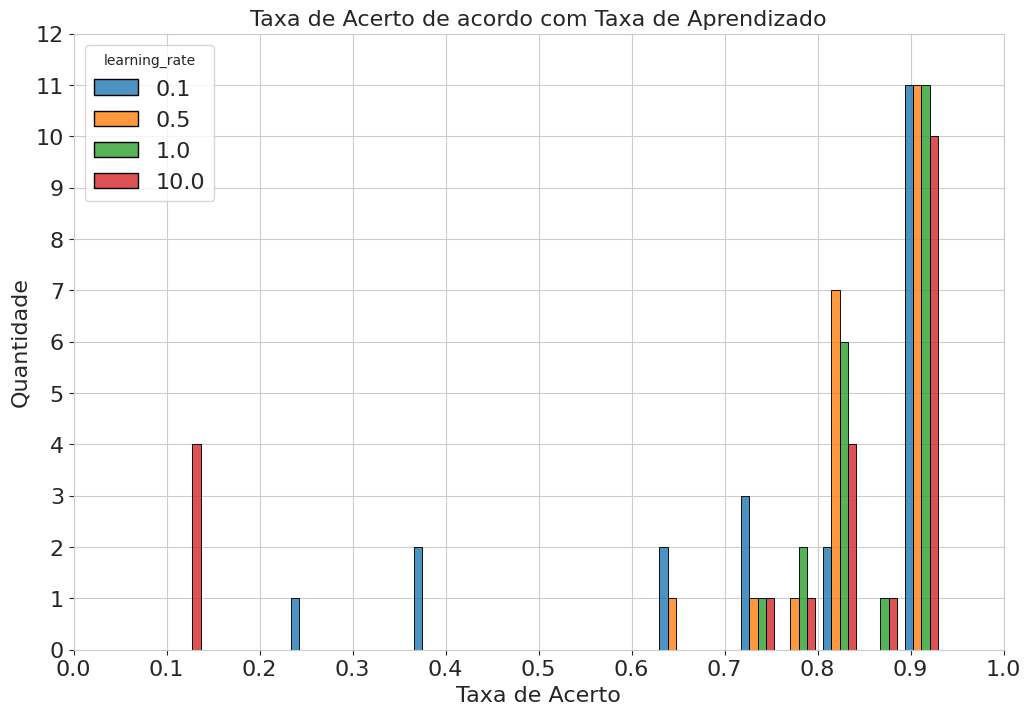

In [15]:
ax = sns.histplot(
    data=results,
    x="taxa_acerto",
    alpha=0.8,
    edgecolor="k",
    hue="learning_rate",
    multiple="dodge",
    shrink=0.8,
    palette="tab10",
)
ax.set(
    title="Taxa de Acerto de acordo com Taxa de Aprendizado",
    xlabel="Taxa de Acerto",
    ylabel="Quantidade",
    xticks=np.arange(0, 1.1, 0.1),
    yticks=np.arange(0, 13, 1),
)
despine()

In [16]:
col = "learning_rate"
relacao_lr_accuracy = (
    results[[col, "accuracy"]].loc[results["accuracy"] == "high"].groupby(col).count()
    / results[[col, "accuracy"]].groupby(col).count()
)
relacao_lr_accuracy

,accuracy
learning_rate,
0.1,0.52381
0.5,0.47619
1.0,0.52381
10.0,0.47619


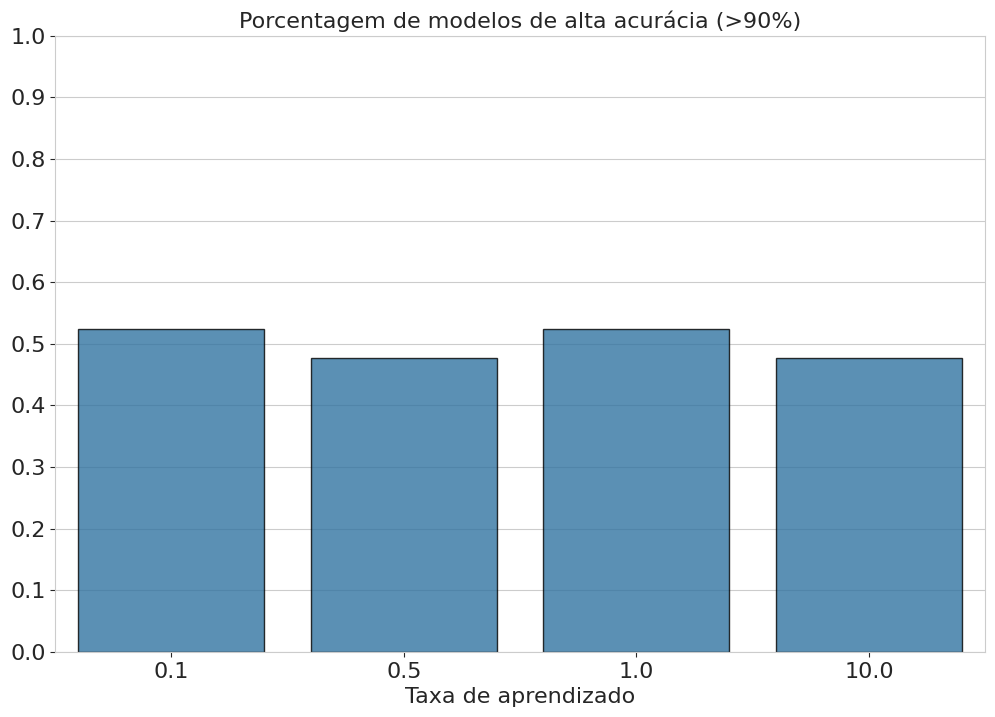

In [17]:
ax = sns.barplot(
    data=relacao_lr_accuracy,
    x="learning_rate",
    y="accuracy",
    alpha=0.8,
    edgecolor="k",
)
ax.set(
    title="Porcentagem de modelos de alta acurácia (>90%)",
    xlabel="Taxa de aprendizado",
    ylabel=None,
    yticks=np.arange(0, 1.1, 0.1),
)
despine()